# SWMAL10 - O1
## 13/02/2026
### Grp10
Magnus Bjørn Nielsen (202305487)

Kasper Dahl (202209642)

Marcus Richter (202305717)

Jens Trinderup (202304846)

# Lecture 1 - Intro

## Section 1.1-1.4
This first section here is sections 1.1-1.4 from the notebook of lecture 1 runned and checked. This can be collapsed for readability of the actual questions. Only thing changes is in the line "datapath = os.path.join("./datasets", "lifesat", "")" - here ../datasets has been replaced by ./datasets.

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [5]:
import os
datapath = os.path.join("./datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! ls

print("\nOK")

datasets  libitmal  O1modules  O1_Notebook_Grp10.ipynb

OK


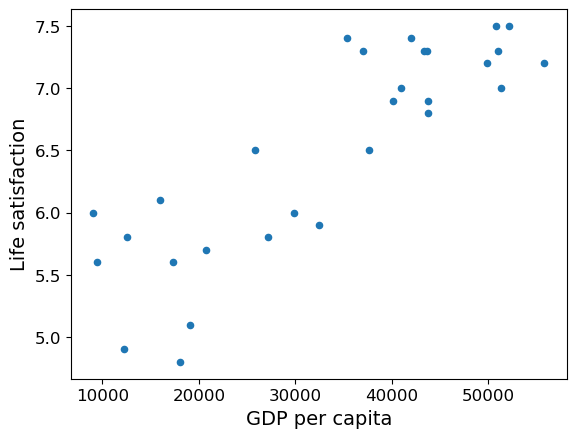

[[5.96242338]]
OK


In [6]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

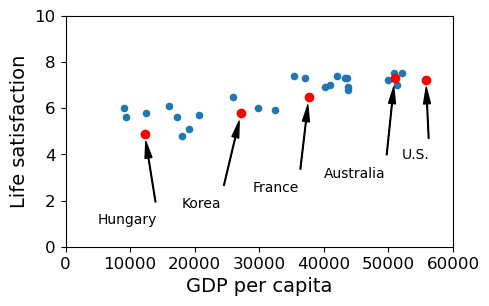

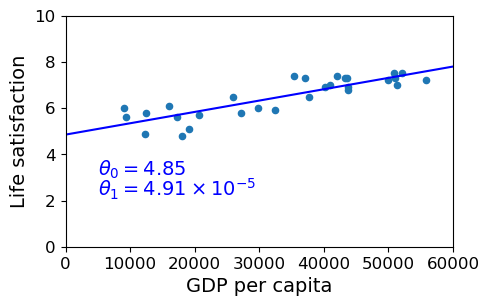

OK


In [7]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa) The $\theta$ parameters and the $R^2$ Score

First the $\theta$ parameters and the $R^2$ Score are extracted. This is done based on the documentation from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. In the documentation, it is stated the $R^2$ score is what is being extracted when using the standard score command. 

In [8]:
R_squared_lin = model.score(X,y) #calling R^2 value
print(R_squared_lin)

0.7344414355437031


As for the parameters, these are found using the .coef_ for the $\theta_1$ and .intercept_ for the $\theta_0$

In [9]:
θ_0 = model.intercept_
θ_1 = model.coef_

print("[theta0, theta1] =", θ_0,θ_1) 

[theta0, theta1] = [4.8530528] [[4.91154459e-05]]


The maximum value for $R^2$ is 1, and its minimum is negative infinity. That is $R^2 \in (-\infty, 1]$. It is better to have a high $R^2$ value, which means it is a function that measures fitness/goodness. The higher the value, the better the fit.

## Qb) Using k-Nearest Neighbours

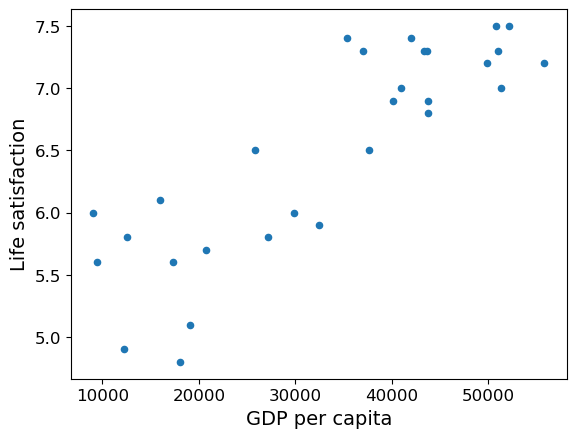

In [10]:
#setting up data from problem formulation and visualizing data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


Now that the data has been prepared and visualized, the k-nearest neighbour regressor is to be set up. This will be done following the sklearn documentation from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [11]:
#Initializing and training model
model_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X,y)

#predicing value for cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred_knn = model_knn.predict(X_new)

diff = y_pred-y_pred_knn #difference in values
print("Prediction from knn regressor with k=3:", y_pred_knn)
print("difference from linear regressor", diff)


Prediction from knn regressor with k=3: [[5.76666667]]
difference from linear regressor [[0.19575671]]


The model predicts 5.77 which is less than the linear model by about 0.2. The KNN-model uses $R^2$ as its score, which is the same as the linear-regressor. As they use the same scores, they are comparable. 

## Qc) Tuning Paramter for k-Nearest Neighbours and a Sanity check

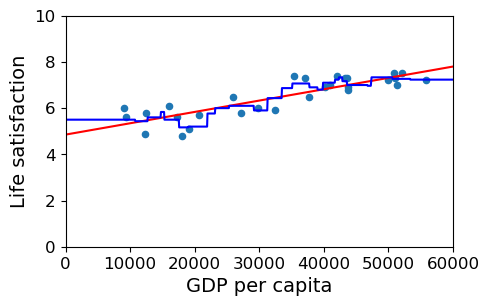

In [12]:
#initial plot from problem formulation

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = model_knn.predict(M)   

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

To tune the parameter 3 different plots are made on KNN with neighbours k=1,5,10. 

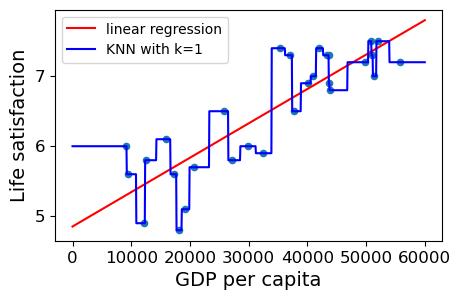

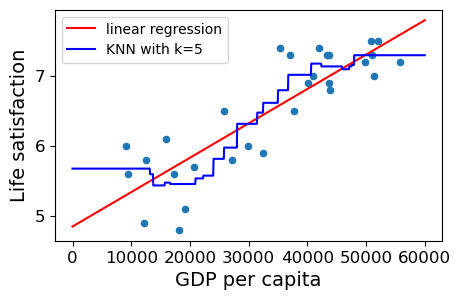

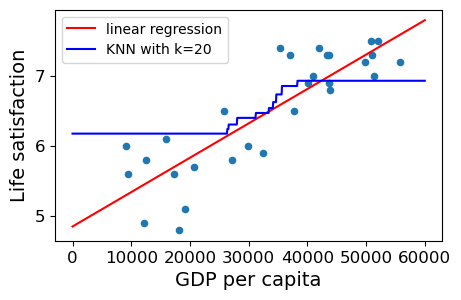

In [13]:
scores_knn = np.zeros(3)
k_values = [1,5,20]

for i in range(3):
    #setting up model and fitting
    model_knn_modified = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k_values[i])
    model_knn_modified.fit(X,y)

    #prediction
    y_pred_knn_modified = model_knn_modified.predict(M)

    #storing score
    scores_knn[i] = model_knn_modified.score(X,y)
    
    sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
    plt.plot(m, y_pred_lin, "r",label = "linear regression")
    plt.plot(m, y_pred_knn_modified, "b", label = f"KNN with k={k_values[i]}")
    plt.legend()
    plt.show

It is apparent from the plots, that when a larger k is used, the model converges towards simply predicting the average. For the k-value of 1, the model directly hits all the datapoints. The scores may be examined.

In [14]:
print("scores with k=1,5,20 =:", scores_knn)

scores with k=1,5,20 =: [1.         0.80239754 0.55237627]


For k=1 a score of $R^2=1$ is achieved. In theory this is great, but in reality not so much. This is a consequence of overfitting, but more importantly, it is a consequence of the prediction being made on the traning data itself, and not on testing data. When k=1 the average of the nearest neighbours, is just the value of the point itself as it has no neighbours, so when you try to predict a value on the data the model was trained on, that prediction will lie directly on top of the datapoint itself. Not ideal, this would not be the prefered estimator for the job.

## Qd) Trying out Neural neworks

Predicted value for cyprus: [4.07671125] Score:  -3.6741440524096074


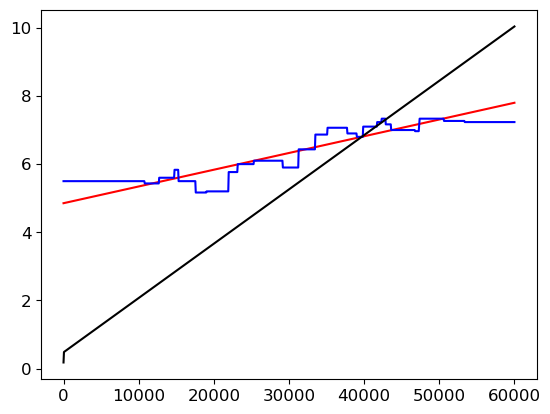

In [15]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

#score and prediction for cyprus
score_mlp = mlp.score(X,y)
y_pred_mlp_cyprus = mlp.predict(X_new)

#printing score and predicted value for last iteration
print("Predicted value for cyprus:",y_pred_mlp_cyprus,"Score: ",score_mlp)

It is apparent that the prediction of Cyprus does not hold, it even (in this run atleast) produces a negative value, which is a clear indicator that MLP is bad choice of model. From the documentaiton on the mlp regressor at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html it is stated that the score used is $R^2$ and thus it may be compared with the linear and KNN models. The score also indicates a bad choice of model, as this is also negative (very much so in some runs)

## Qe) Neutral Network with prescaling

To scale the data, a min-max scaling will be implemented using sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Predicted value for cyprus: [5.88713522] Score:  0.7242636173560772


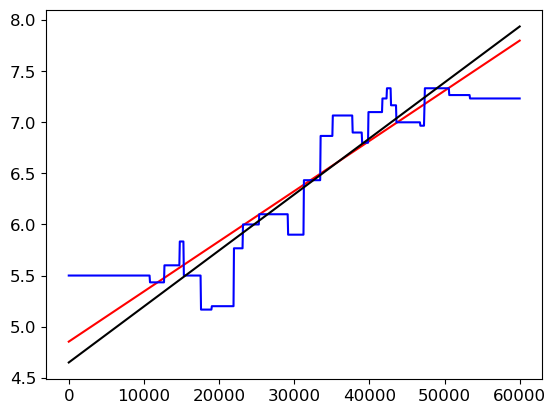

In [16]:
from sklearn.preprocessing import MinMaxScaler

#setting up scaling
scaler = MinMaxScaler()
scaler.fit(X)

#scaling design matrix, M and X_new value for cyprus
X_scaled = scaler.transform(X)
X_new_scaled = scaler.transform(X_new)
M_scaled = scaler.transform(M)

assert np.all((X_scaled >= 0) & (X_scaled <= 1)) #checking that the values dont exceed the bounds

#Reinitializing, refitting and replotting
mlp_scaled = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp_scaled.fit(X_scaled, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp_scaled = mlp_scaled.predict(M_scaled) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp_scaled, "k")

#score and prediction for cyprus
score_mlp_scaled = mlp_scaled.score(X_scaled,y)
y_pred_mlp_scaled_cyprus = mlp_scaled.predict(X_new_scaled)

#printing score and predicted value for last iteration
print("Predicted value for cyprus:",y_pred_mlp_scaled_cyprus,"Score: ",score_mlp_scaled)


The new score is a lot better, and almost of the same quality of the KNN and the linear models. Even though the score is better, the model is still not a great choice, since it is a lot more complex compared to the linear one while producing comparable estimations

# Lecture 2 - Modules and Classes

In [17]:
#Resetting all variables 
%reset -f
print("ok")

ok


## Qa Load and test the libitmal module (MISSING DOCUMENTATION ON PATH SETUP? WHAT

The path setup for one group member is displayed in the image below.

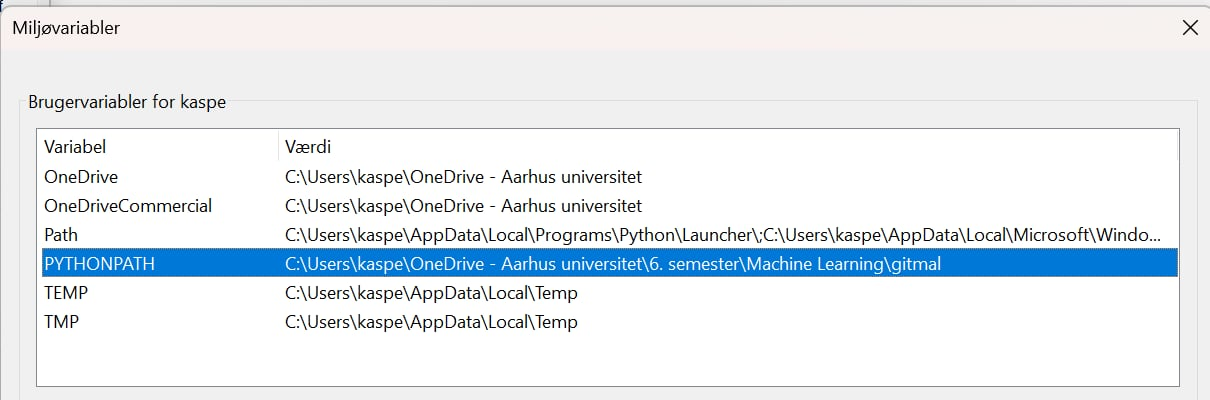

In [18]:
#time to import and test module
import numpy as np #if we need it 
from libitmal import utils as itmalutils #this has been moved to the folder containing the assignment itself

itmalutils.TestAll()
import sys


TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


## Qb) Create your own module, with some functions, and test it
The module is in the folder of the assignment itself. The directory is /O1modules/testmodule.py. The folder is build like this:
```
O1/                                         
├── O1_Notebook_Grp10.ipynb             
├── datasets/                            
├── libitmal/                           
│   ├── __init__.py                 
│   ├── utils.py                        
│   └── __pycache__/                    
└── O1modules/    <-- Module package. Test module is in here
    ├── __init__.py                         
    ├── testmodule.py   <-- Test Module
    └── __pycache__/                        
```

In [20]:
#importing module
from O1modules import testmodule as tm

tm.namepredictor("ModuleMaster")

Your name is  ModuleMaster


## Qc) How do you recompile a module

The simplest way to recompile a module is to simply restart the kernel after every change to the module. Another choice is to use the importlib library and then do importlib.reload(module_that_has_been_changed). 

A third option is to use the IPython autoreload feature. Link to documentation: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

In [21]:
#Enabling autoreload using IPython method

#the 2 is to reload modules before every cell execution. Quite nice.
%load_ext autoreload
%autoreload 2

## Qd) Write a howto on Python Modules and Packages

A module is a python file containing python code. Could be functions, classes, variables etc etc. A package is a directory of modules, i.e a package can contain several different modules. Its directory structure is built like the example below
```              
MechEhelper/   
    ├── __init__.py                         
    ├── mathmodule.py
    ├── physicsmodule.py 
    └── __pycache__/                        
```
Here the MechEhelper package has 2 modules; a mathmodule and a physicsmodule. An example of use could be, that the physicsmodule contains helper functions that can calculate stress, strain, kinetic energy and such. There might be a function called kineticenergy(v,m). It also has a __init__ file which enables python to recognize that there are modules in the folder, it marks the directory as a package.

To import a module, do 
```python
from MechEhelper import physicsmodule as physics
```
Then one can calculate the kinetic energy of an object based on mass and velocity as 
```python
KNE = physics.kineticenergy(v,m)
```
It is important that Python must be able to find the package. This means in this example, that the directory containing MechEHelper must be on sys.path. In Windows this can be done using 
```bash
CMD> setx.exe PYTHONPATH "C:\Users\somethingsomething\O1"
```


## Qe) Extend the class with some public and private functions and member variables

In [22]:
## extending class with public and private functions and member variables
class MyClass:
   
    def myfun(self):
        self.myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={self.myvar}.")
    
    #public function - although myfun is also a public function
    def public_hello(self):
        print("Hello public, i am not shy")
        
    #private function using namemangling
    def __private_hello_name_mangled(self):
        print("Why are you accesing me, i would like to be in private please, i even got my name mangled to avoid this")

    #private function by convention
    def _private_hello(self):
        print("Why are you accesing me, i would like to be in private please")

    #making some private on public variables
    def variables(self):
        self.public_var = "public variable"
        self.__private_var = "private variable"

    def testwithoutself(): #to see what happens without self
        pass

myobjectx = MyClass()


The class has now been extended to have a public function, a private function, and some public and private variables.

Private function and member variables in python classes are represented using double underscore __ or by a single underscore _. The single underscore is used to signal that the function or variable shouldn't be used outside the class. It is still technically accesable. The double underscore triggers "Name Mangling" which renames the attribute to include class name, so its harder to access (although still doable, but then you're asking for it to go wrong). It essentially renames from __function to _MyClass__function, which is a way to avoid accedentially accessing it. Examples below

In [23]:
myobjectx.public_hello()

Hello public, i am not shy


In [24]:
#private by convention, not actually private. Kind of like having a sign on a toilet door without a lock. 
#sign might say "occupied", but i can still walk in if i want to (would be a bit rude)
myobjectx._private_hello() 

Why are you accesing me, i would like to be in private please


In [25]:
#private by name mangling, so its not accessed by accident, but it can still be accessed
myobjectx._MyClass__private_hello_name_mangled()

#however if trying as normal, it fails (this is supposed to fail)
myobjectx.__private_hello_name_mangled()

Why are you accesing me, i would like to be in private please, i even got my name mangled to avoid this


AttributeError: 'MyClass' object has no attribute '__private_hello_name_mangled'

The same examples extend to the private and public variables.

Now turning to self. self is used to reference the current instance of the class. This way it allows the code to distinguish between which variables are simply local to the function within the class, and which variabels blong to the specific object of the class. 

By omitting self in a function within the class, the class does not know which object to attatch to, and thus fails. When calling a function within a class, python automatically passes the object as the first argument, that is it in reality passes something like MyClass.myfun(myobjectx). However, in MyClass, if instead the function MyClass.testwithoutself() is called, python actually passes MyClass.testwithoutself(myobjectx), which will lead to failure, as testwithoutself does not take any arguments. This can be seen below



In [26]:
myobjectx.testwithoutself()

TypeError: MyClass.testwithoutself() takes 0 positional arguments but 1 was given

It can be seen directly from the error message, that 1 positional argument was given, as expected.

## Qf Extend the class with a Constructor
The constructor is defined using the `__init__` method. It is called automatically when an object is created from a class. It initialized the object by setting up attributes.

In [27]:
##Extending class with a consructor. 
class MyClass:

    def __init__(self,favoritebar,age):
        self.favbar = favoritebar
        self.age = age
    
    def myfun(self):
        self.myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={self.myvar}.")
    
    #public function - although myfun is also a public function
    def public_hello(self):
        print("Hello public, i am not shy")
        
    #private function using name mangling
    def __private_hello_name_mangled(self):
        print("Why are you acessing me, i would like to be in private please, i even got my name mangled to avoid this")

    #private function by convention
    def _private_hello(self):
        print("Why are you acessing me, i would like to be in private please")


    def variables(self):
        self.public_var = "public variable"
        self.__private_var = "private variable"

    def testwithoutself(): #to see what happens without self
        pass

#creating new object and calling with favorite bar and age
myobjecty = MyClass("Katrines kælder", "23")

#check that object is intialized with these values
print("favorite bar:", myobjecty.favbar,", age:", myobjecty.age)

favorite bar: Katrines kælder , age: 23


As for the class deconstructors, we were told to ignore this, as we are studying Mechanical Engineering and have no C or C++ knowledge.

## Qg Extend the class with a to-string function

Showcasing to-string function with Fruit class example:


In [28]:
class Fruit: 
    def __init__(self, name, color):
        self.name = name 
        self.color = color

apple = Fruit("apple","red")


print(apple)

In [29]:
class Fruit: 
    def __init__(self, name, color):
        self.name = name 
        self.color = color

    def __str__(self):
        return f"{self.color} {self.name}"

apple = Fruit("apple","red")

print(apple)

red apple


```__str__ ```controls how an object is converted to a human-readable string. 

without the string python prints the class name and memory address (falls back to ```__repr__ ``` ): <__main__.Fruit object at 0x70eb01495d30>

with the string, python prints the custom string: red apple

## Qh Write a Howto on Python Classes


A python class is like a blue-print and the object is an instance that you can call from the class. So the class is used to state which attribute your object will have, and then the object is like an "item" with the attritutes/properties. A class could be Humans, and then an attritbute to an object could be hair color, eye color etc. Classes may have private and public functions and variables. Public is something that should be used outside of the class, wheras privat are internal. Self is the current instance. We can use the constructor to create new objects. Inheritance in python allows us to use and extend other classes. 

# Lecture 3 - Dummy Classifier

In [30]:
#Resetting all variables - for en god ordens skyld
%reset -f
print("ok")

ok


## Qa Load and display the MNIST data

When fetching the data return_X_y is set to true. This is done to get the design matrix and the labels. Furthermore, as_frame is set to False to get X and y as NumPy arrays

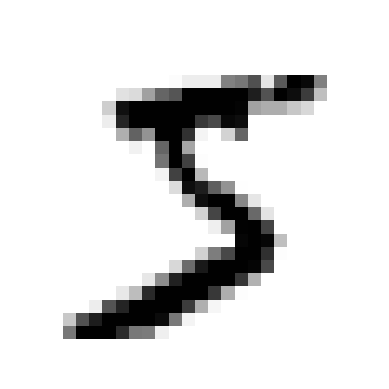

In [31]:
from sklearn.datasets import fetch_openml #importing fetch_openml
import numpy as np
import matplotlib.pyplot as plt

#setting up a function to load dataset
def MNIST_GetDataSet():
    #loading data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784',return_X_y=True,as_frame=False) #return_X_y=True to 
    np.shape(X)
    X = X / 255 #scaling data to [0;1]

    return X,y

#loading dataset using function
X,y = MNIST_GetDataSet()
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

#calling plotting function. Each row of the design matrix X is a flatened image, so in this case, the first image is plotted
#MNIST_PlotDigit(X[0,:])

MNIST_PlotDigit(X[0,:])


## Qb Add a Stochastic Gradiant Decent [SGD] Classifier

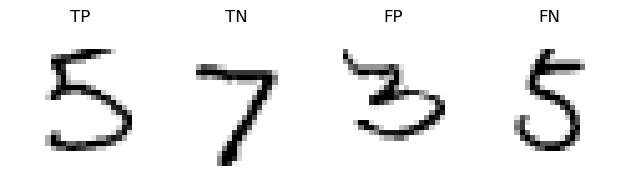

In [32]:
#changing labels from strings to integers. This is to be able to create boolean vectors classifying 5 or not 5
y = y.astype(np.uint8)

#MNIST is already split into training and test. first 60000 images = traning, last 10000 images = test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#no need to reshape data, as it is already 2D array

#target vectors for classification tasks. The aim is to classify whether a number is a 5 or not.

#these two vectors contain "True" on all indices corresponding to a 5, and "False" otherwise.
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

#creating SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #using same random state as book

#training classifier on training set
sgd_clf.fit(X_train,y_train_5)

#predicting on X_test
y_pred = sgd_clf.predict(X_test)

#finding cases where it classified correctly and incorrectly by comparing predictions with labels

tp = (y_pred == y_test_5) & (y_test_5 == True) #where it predicted correcly and the number is 5
tn = (y_pred == y_test_5) & (y_test_5 == False) #where it predicted correctly and the number is not 5
fp = (y_pred != y_test_5) & (y_test_5 == False) #Where it said the number was a 5 although it was
fn = (y_pred != y_test_5) & (y_test_5 == True) #Where it said the number as not a 5, but it actually was

#Extracting these cases from the test data. Note to self: Numpy can directly index using boolean arrays.
X_tp = X_test[tp,:]
X_tn = X_test[tn,:]
X_fp = X_test[fp,:]
X_fn = X_test[fn,:]

#plotting
plt.figure()

plt.subplot(1, 4, 1)
MNIST_PlotDigit(X_tp[0, :])
plt.title("TP")

plt.subplot(1, 4, 2)
MNIST_PlotDigit(X_tn[0, :])
plt.title("TN")

plt.subplot(1, 4, 3)
MNIST_PlotDigit(X_fp[0, :])
plt.title("FP")

plt.subplot(1, 4, 4)
MNIST_PlotDigit(X_fn[1, :]) #choosing second entry here, because it is very easy to tell that it is a 5
plt.title("FN")

plt.tight_layout()
plt.show()

## Qc) Implement a dummy binary classifier

In [33]:
##following example from HOML
from sklearn.base import BaseEstimator

#creating dummy classifier and inheriting from the baseestimator
class DummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

#instantiating dummy classifier
dummy_clf = DummyClassifier()

#fitting data
dummy_clf.fit(X_train,y_train_5)

#predicting using the dummy classifier
y_pred_dummy = dummy_clf.predict(X_test)

#Finding accuracy score
from sklearn.metrics import accuracy_score
accuracy_dummy = accuracy_score(y_test_5,y_pred_dummy)
print(accuracy_dummy)

0.9108


Thus the dummy-classifier has an accuracy of $91.08\%$. The scores from HOML's cross validation are 0.91125, 0.90855 and 0.090915 which are all very close. They are comparable, as both cross validation and accuracy_score both are ways to predict a percentage of correct predictions.

## Qd) Multiclass Classification

Will be trying out the DecisionTreeClassifier and KNNclassifier

Starting with the DecisionTreeClassifier from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
from sklearn.metrics import accuracy_score

#firstly trying out decision tree
from sklearn.tree import DecisionTreeClassifier

#training, fitting, predicting
DTree = DecisionTreeClassifier(random_state=42)
DTree.fit(X_train, y_train)
y_pred_DTree = DTree.predict(X_test)

#accuracy
DTree_acc = accuracy_score(y_test, y_pred_DTree)

print(DTree_acc)

0.8754


Accurraccy is good. Moving on to the KNNclassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [5]:
from sklearn.neighbors import KNeighborsClassifier

#training, fitting, predicting
KNN_clf = KNeighborsClassifier(n_neighbors=5) #using 5 neighbours (this is just the standard value)
KNN_clf.fit(X_train, y_train)
y_pred_KNN_clf = KNN_clf.predict(X_test)

#accuracy
KNN_clf_acc = accuracy_score(y_test, y_pred_KNN_clf)

print(KNN_clf_acc)

0.9688


Accurraccy is pretty good. Even better than the DecisionTree! But it took a lot longer to run. We can try on our dummy classifier



In [34]:
dummy_clf.fit(X_train, y_train)
y_pred_dummy_clf = dummy_clf.predict(X_test)

Unfortunately this computer is a weakling, and cannot handle it within a reasonable timeframe.

## Qe) Conclusion

The dummyclassifier underlined the fact that a good score doesn't necessarily means that the trained model is good. Also the exercises showed how knowledge about classes is fundamental to understand how estimators in sklearn are built, and also if one wants to built their own estimator. Even though it seems easy to call 5 lines of code in the last exercise, you have to consider the dataset size, the order of operations of the different estimators, etc when choosing an ML algorithm.

# Lecture 4 - Cost function

In [1]:
#Resetting all variables - for en god ordens skyld
%reset -f
print("ok")

ok


## Qa) Given the following x vectors construct and print the X matrix in python

In [2]:
import numpy as np
y_true = np.array([1,2,3,4])

#setting up vectors
x1, x2, x3, x4 = np.array([1, 2, 3]), np.array([4, 2, 1]), np.array([3, 8, 5]), np.array([-9, -1, 0])

#stacking vectors vertically to create design matrix
X = np.vstack((x1,x2,x3,x4))
print(X)

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


## Qb implement the manhatten and eucledian norm

In [3]:
#not much to write or say, implementation works.

#L1 norm funtion
def L1(vector):
    assert vector.ndim == 1, f"Expected 1D array, got shape {vector.shape}"
    sum = 0 #intializing sum
    for q_i in vector:
        sum = sum + (q_i**2)**0.5 #squaring then sqrt to remove negative

    return sum

#L2 norm function
def L2(vector):
    assert vector.ndim == 1, f"Expected 1D array, got shape {vector.shape}"
    sum = 0 #initialzing sum
    for q_i in vector:
        sum = sum + q_i**2

    return sum**0.5
    
#testing both against nplingalg norm
test_vec = np.array([1,2,3,4,5])

assert L1(test_vec) - np.linalg.norm(test_vec,1)<1E-9, "L1 norm function failed against np"
assert L2(test_vec) - np.linalg.norm(test_vec,2)<1E-9, "L2 norm function failed against np"

#tests from problem statement
import math
# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

#Matrix multiplication implementation
def L2MatrixMult(vector):
    assert vector.ndim == 1, f"Expected 1D array, got shape {vector.shape}"
    L2_sq = vector.T@vector
    L2 = L2_sq**0.5

    return L2

d2 = L2MatrixMult(tx-ty)
print(f"d2[matrix mult]-expected_d2 = {d2-expected_d2}")
assert math.fabs(d2-expected_d2)<eps, "L2MatrixMult dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2[matrix mult]-expected_d2 = 0.0
OK(part-2)


## Qc) Construct the Root Mean Square Error function

In [4]:
def RMSE(h,y_true):
    assert y_true.ndim == 1, f"Expected 1D array, got shape {vector.shape}"
    assert h.ndim == y_true.ndim, f"h and y_true are not the same dimensions, got {h.shape} for h and {y_true.shape} for y_true"
    n = len(y_true) #no. of entries in y

    return L2(h-y_true)/(n**0.5) #RMSE is just L2 norm divided by sqrt(n)

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X), y_true)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


## Qd) Construct MAE

In [5]:
#MAE is just L1 norm divded by no. entires in y_true
def MAE(h,y_true):
    assert y_true.ndim == 1, f"Expected 1D array, got shape {vector.shape}"
    assert h.ndim == y_true.ndim, f"h and y_true are not the same dimensions, got {h.shape} for h and {y_true.shape} for y"
    
    n = len(y_true) #no. of entries in y
    return L1(h-y_true)/n #RMSE is just L2 norm divided by sqrt(


# Calls your MAE function:
r=MAE(h(X), y_true)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")


MAE=3.75, diff=0.0
OK


## Qe Robust Code

Asserts have been added to ensure code is robust. These mainly ensure that the inputs passed are actually vectors and are consistent in dimensions with eachother.

## Qf Conclusion
In this lecture, we have examined some of the belly of the principles behind cost functions. Examining these helps get an intuitive understanding of how differnt cost functions are calculated. Both functions for L1 and L2 norms have been implemented, aswell as functions that directly references these functions to calculate MAE and RMSE. A look has also been taken upon how vector notation can save both time and notational clutter when dealing with norms. Lastly, asserts were implemented. These are important for robust code, and can save a lot of time during debugging. 

# Lecture 4 - Performance Metrics

In [6]:
#Resetting all variables - for en god ordens skyld
%reset -f
print("ok")

ok


## Qa) Implement the accuracy function and test it on the MNIST data

In [7]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

#Own implementation function
def MyAccuracy(y_true, y_pred):
    assert y_pred.shape[0] == y_true.shape[0], "Given vectors are not equal in number of entries"
    assert y_pred.ndim == 1, "Inputs are not vectors"

    #if empty vector is passed denominator becomes 0
    N = y_true.shape[0]
    if N == 0:
        raise ValueError("Cannot compute accuracy on empty input.")
    
    TP_TN = (y_true == y_pred).sum() #calculates number of correct predictions
    return TP_TN / N

#MNIST get data set function (same as the one implemented before, just put here so the section can be run alone
def MNIST_GetDataSet():
    from sklearn.datasets import fetch_openml
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784',return_X_y=True,as_frame=False) # needs to return X, y, replace '??' with suitable parameters! 
    # Convert to [0;1] via scaling (not always needed)
    X = X / 255.
    return X,y

#dummyclassifier

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        assert X.ndim==2
        return np.zeros(X.shape[0],dtype=bool)
    def score(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)

#below is a lot of the same code as before. Simply just fetching data, splitting, training, fitting, calculating accuracy

X,y = MNIST_GetDataSet()

#MNIST is already split into training and test. first 60000 images = traning, last 10000 images = test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#looking for 5's
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

#SGD classifier
SGD_clf = SGDClassifier(random_state=42)
SGD_clf.fit(X_train,y_train_5)
y_pred_5_SGD = SGD_clf.predict(X_test)
a_SGD_clf = MyAccuracy(y_test_5,y_pred_5_SGD)
a_SGD_clf_sklearn = accuracy_score(y_test_5,y_pred_5_SGD)

# Dummy classifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
y_pred_5_dummy = dummy_clf.predict(X_test)
a_dummy_clf = MyAccuracy(y_test_5,y_pred_5_dummy)
a_dummy_clf_sklearn = accuracy_score(y_test_5,y_pred_5_dummy)

print(f"dymmy_clf: MyAccuracy={a_dummy_clf}, SKlearn={a_dummy_clf_sklearn}, Diff={a_dummy_clf-a_dummy_clf_sklearn}")
print(f"SGD_clf: MyAccuracy={a_SGD_clf}, SKlearn={a_SGD_clf_sklearn}, Diff={a_SGD_clf-a_SGD_clf_sklearn}")

dymmy_clf: MyAccuracy=0.9108, SKlearn=0.9108, Diff=0.0
SGD_clf: MyAccuracy=0.9769, SKlearn=0.9769, Diff=0.0


So it works!

## Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

Starting with Precision. This is the ratio of true positives to the sum of true positives and false positives. I.E how many values that were predicted positive were actually positive.

In [9]:
def MyPrecision(y_true, y_pred):
    assert y_pred.shape[0] == y_true.shape[0], "Given vectors are not equal in number of entries"
    assert y_pred.ndim == 1, "Inputs are not vectors"

    TP = ((y_true == y_pred) & (y_true == 1))
    if y_pred.sum() == 0:
        p=0
        print("Zero positive predictions")
    else:
        p = TP.sum() / y_pred.sum()    
    return p

#testing implementation on SGD
#Comparing precision
p_SGD_clf = MyPrecision(y_test_5,y_pred_5_SGD)
p_SGD_clf_sklearn = precision_score(y_test_5,y_pred_5_SGD)

print(f"Precision diff SGD.:{p_SGD_clf-p_SGD_clf_sklearn}")

Precision diff SGD.:0.0


In [13]:
#testing implementaton on dummy_classifier. Note that the dummy_classifier spits out all zeros, so this will fail.
p_dummy_clf = MyPrecision(y_test_5,y_pred_5_dummy)
p_dummy_clf_sklearn = precision_score(y_test_5,y_pred_5_dummy,zero_division="warn")

print(f"Precision diff dummy.: dummy_clf={p_dummy_clf-p_dummy_clf_sklearn}")


Zero positive predictions
Precision diff dummy.: dummy_clf=0.0


/home/jenzlaptop/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Moving on to the recall. This is the ratio of true positive to number of positives. So in essence, how many positives of all positives does the prediciton catch.

In [16]:
def MyRecall(y_true, y_pred):
    assert y_pred.shape[0] == y_true.shape[0], "Given vectors are not equal in number of entries"
    assert y_pred.ndim == 1, "Inputs are not vectors"

    TP = ((y_true == y_pred) & (y_true == 1)).sum()
    Np = y_true.sum()
    r = TP / Np
    return r

# Comparing recall
r_SGD_clf = MyRecall(y_test_5,y_pred_5_SGD)
r_SGD_clf_sklearn = recall_score(y_test_5,y_pred_5_SGD)
r_dummy_clf = MyRecall(y_test_5,y_pred_5_dummy)
r_dummy_clf_sklearn = recall_score(y_test_5,y_pred_5_dummy)
print(f"Recall diff.: dummy_clf={r_dummy_clf-r_dummy_clf_sklearn}, SGD_clf={r_SGD_clf-r_SGD_clf_sklearn}")

Recall diff.: dummy_clf=0.0, SGD_clf=0.0


Moving on to $F_1$ score. 

In [18]:
def MyF1Score(y_true, y_pred):
    assert y_pred.shape[0] == y_true.shape[0], "Given vectors are not equal in number of entries"
    assert y_pred.ndim == 1, "Inputs are not vectors"
    p = MyPrecision(y_true, y_pred)
    r = MyRecall(y_true, y_pred)
    if (p+r) == 0:
        F1=0
    else:
        F1 = (2*p*r) / (p+r)
    return F1


# Comparing F1
f1_SGD_clf = MyF1Score(y_test_5,y_pred_5_SGD)
f1_SGD_clf_sklearn = f1_score(y_test_5,y_pred_5_SGD)
f1_dummy_clf = MyF1Score(y_test_5,y_pred_5_dummy)
f1_dummy_clf_sklearn = f1_score(y_test_5,y_pred_5_dummy)
print(f"F1 diff.: dummy_clf={f1_dummy_clf-f1_dummy_clf_sklearn}, SGD_clf={f1_SGD_clf-f1_SGD_clf_sklearn}")

Zero positive predictions
F1 diff.: dummy_clf=0.0, SGD_clf=1.1102230246251565e-16


## Qc The confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5, y_pred_5_dummy)
M_SGD = confusion_matrix(y_test_5, y_pred_5_SGD)

print(f"M_dummy=\n{M_dummy}\n\nM_SGD=\n{M_SGD}")

M_dummy=
[[9108    0]
 [ 892    0]]

M_SGD=
[[9068   40]
 [ 191  701]]


It its called the other way around, the transpose is given

In [21]:
M_SGD_transpose = confusion_matrix(y_pred_5_SGD,y_test_5)

assert M_SGD_transpose.T.all() == M_SGD.all(), "you were wrong, it is not the tranposed - fool!"

print(M_SGD_transpose)

[[9068  191]
 [  40  701]]


## Qd) A confusion matrix heatmap

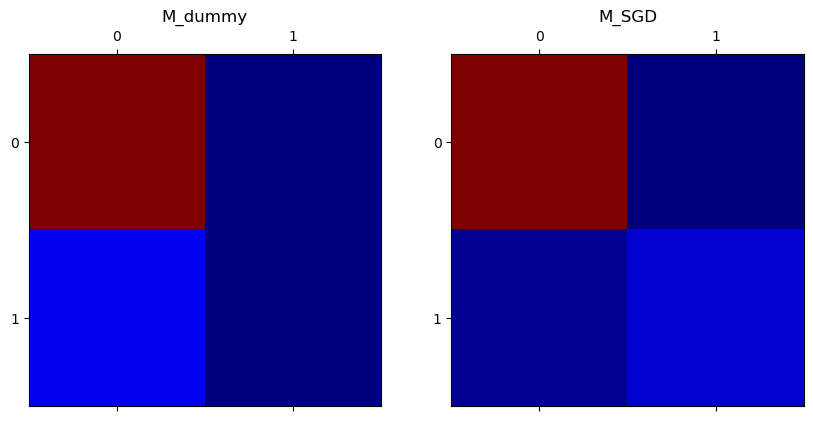

In [22]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#choosing jet colormap as grayscale is a bit hard to read.

# Plot the first matrix
ax1.matshow(M_dummy, cmap=plt.cm.jet)
ax1.set_title("M_dummy")

# Plot the second matrix
ax2.matshow(M_SGD, cmap=plt.cm.jet)
ax2.set_title("M_SGD")

plt.show()

## Qe Conclusion

Important to understand different performance metrics and what they tell us, in order to use them for evaluation and comparison of ML algorithms. A good way to learn this, is to code them ourselves instead of just calling a built-in function. The confusion matrix/map allows the programmer to see where the algorithm is doing good and bad, whereas the most of the other performance metrics only let you know how the algorithm is doing, but not where its doing great and not so great (for the NMIST the algorithm might confuse some numbers more than others, but this is only visible with the confusion matrix, not the other performance metrics).